In [1]:
import pandas as pd
# import_source="https://raw.githubusercontent.com/tlaphane/Machine-Learning---Twitter-User-Gender-Classification/master/gender-classifier-DFE-791531.csv"
df = pd.read_csv('gender-classifier-DFE-791531.csv',encoding='latin1')
print("data is loaded")

data is loaded


In [2]:
import numpy as np 
df.head(10) ##or dataframe.tail(n) for the last rows of the dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


# Checking if there are missing values
True means the number of values that are present

False means the number of values that are missing

In [3]:
for column in df.notnull().columns.values.tolist():
    print (df.notnull()[column].value_counts().to_frame())
    print("\n")  

      _unit_id
True     20050


      _golden
True    20050


      _unit_state
True        20050


      _trusted_judgments
True               20050


       _last_judgment_at
True               20000
False                 50


       gender
True    19953
False      97


       gender:confidence
True               20024
False                 26


      profile_yn
True       20050


      profile_yn:confidence
True                  20050


      created
True    20050


       description
True         16306
False         3744


      fav_number
True       20050


       gender_gold
False        20000
True            50


      link_color
True       20050


       name
True  20050


       profile_yn_gold
False            20000
True                50


      profileimage
True         20050


      retweet_count
True          20050


      sidebar_color
True          20050


       text
True  20050


       tweet_coord
False        19891
True           159


      tweet_count
True        



# Replacing missing values with most frequent value on that feature


### The following are the identified features with missing values:
* _last_judgment_at
* gender
* gender:confidence
* description
* gender_gold
* profile_yn_gold
* tweet_coord
* tweet_location
* user_timezone

In [4]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [5]:
#replacing missing gender value with most frequent gender
df['gender'].replace(np.NaN, "female",inplace=True)
df['gender'].value_counts()

female     6797
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [6]:
#replacing unknown gender value with most frequent gender
df['gender'].replace("unknown", "female",inplace=True)
df['gender'].value_counts()

female    7914
male      6194
brand     5942
Name: gender, dtype: int64

In [7]:
df['gender:confidence'].value_counts()

1.0000    13926
0.0000       71
0.6691       31
0.6709       30
0.6591       30
0.6667       30
0.6619       29
0.6686       27
0.6743       27
0.6769       26
0.6666       25
0.6678       24
0.6715       24
0.6707       24
0.6561       24
0.6752       24
0.6642       24
0.6656       24
0.6609       23
0.6675       23
0.6685       22
0.6766       22
0.6645       22
0.6741       22
0.6711       22
0.6774       22
0.6706       21
0.6659       21
0.6664       21
0.6739       21
          ...  
0.3468        1
0.6955        1
0.6323        1
0.3544        1
0.3337        1
0.3283        1
0.3557        1
0.3575        1
0.3622        1
0.3269        1
0.6986        1
0.3343        1
0.3339        1
0.3307        1
0.6931        1
0.3628        1
0.3319        1
0.3378        1
0.8458        1
0.6961        1
0.6059        1
0.3335        1
0.3722        1
0.3613        1
0.3461        1
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence,

In [8]:
#replacing missing gender:confidence value with most frequent gender:confidence
df['gender:confidence'].replace(np.NaN, 1.0000,inplace=True)
df['gender:confidence'].value_counts()

1.0000    13952
0.0000       71
0.6691       31
0.6709       30
0.6591       30
0.6667       30
0.6619       29
0.6686       27
0.6743       27
0.6769       26
0.6666       25
0.6678       24
0.6715       24
0.6707       24
0.6561       24
0.6752       24
0.6642       24
0.6656       24
0.6609       23
0.6675       23
0.6685       22
0.6766       22
0.6645       22
0.6741       22
0.6711       22
0.6774       22
0.6706       21
0.6659       21
0.6664       21
0.6739       21
          ...  
0.3468        1
0.6955        1
0.6323        1
0.3544        1
0.3337        1
0.3283        1
0.3557        1
0.3575        1
0.3622        1
0.3269        1
0.6986        1
0.3343        1
0.3339        1
0.3307        1
0.6931        1
0.3628        1
0.3319        1
0.3378        1
0.8458        1
0.6961        1
0.6059        1
0.3335        1
0.3722        1
0.3613        1
0.3461        1
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence,

In [9]:
df['description'].value_counts()

You can be spiritually empowered, financially secure, and improve your health all while doing so - our research proves it. Visit https://t.co/GrFOxFjwPV                                             33
Subscribe to her Inspirational channel here http://t.co/P1y6f2Rzoj ~~~~~~~~~~~~~~\nFor promoting on this page email, business_inquiry@outlook.com                                                    32
secret little rendezvous                                                                                                                                                                             27
The Map Game is a free geography quiz based on Google Maps. No flash, no need to register, just start finding places on a blind map!                                                                 24
'Cos even an old girl's best friend is still her MUM!                                                                                                                                                18


In [10]:
#replacing missing description value with most frequent description
df['description'].replace(np.NaN, "You can be spiritually empowered, financially secure, and improve your health all while doing so - our research proves it. Visit https://t.co/GrFOxFjwPV",inplace=True)
df['description'].value_counts()

You can be spiritually empowered, financially secure, and improve your health all while doing so - our research proves it. Visit https://t.co/GrFOxFjwPV                                             3777
Subscribe to her Inspirational channel here http://t.co/P1y6f2Rzoj ~~~~~~~~~~~~~~\nFor promoting on this page email, business_inquiry@outlook.com                                                      32
secret little rendezvous                                                                                                                                                                               27
The Map Game is a free geography quiz based on Google Maps. No flash, no need to register, just start finding places on a blind map!                                                                   24
'Cos even an old girl's best friend is still her MUM!                                                                                                                                           

In [11]:
df['gender_gold'].value_counts()

male               19
female             14
brand              13
unknown             2
male\nunknown       1
female\nunknown     1
Name: gender_gold, dtype: int64

In [12]:
df.loc[(df["gender_gold"] == "unknown")]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20024,815754614,True,golden,235,NaN,brand,0.5540,yes,1.0,3/24/09 20:52,...,https://pbs.twimg.com/profile_images/649004216...,0,0,The droids you're looking for... https://t.co/...,NaN,18857,10/26/15 12:39,6.587300e+17,New Zealand,Auckland
20042,815756642,True,golden,212,NaN,brand,0.6364,yes,1.0,6/8/14 19:07,...,https://pbs.twimg.com/profile_images/616770699...,0,948C75,Best Bloody Mary Brunch at the #NYCWFF @nyceff...,NaN,5900,10/26/15 12:40,6.587300e+17,"Miami, FL",Eastern Time (US & Canada)


In [13]:
# correction of gender_role from "unknown" to "brand" since profile is golden and gender is brand
df.loc[(df["gender_gold"] == "unknown")]
m = df["gender_gold"] == "unknown"
df.loc[m,'gender_gold'] = df.loc[m,'gender_gold'].astype(str).replace(r'unknown','brand',regex=True)
df["gender_gold"].value_counts()

male               19
brand              15
female             14
male\nunknown       1
female\nunknown     1
Name: gender_gold, dtype: int64

In [14]:
df[(df["gender_gold"] == "female\nunknown")]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20016,815753740,True,golden,228,NaN,female,0.765,yes,1.0,8/27/11 19:14,...,https://pbs.twimg.com/profile_images/657782196...,0,0,@iJamCrazyy aka I miss hoopin and womping in t...,NaN,26769,10/26/15 12:40,6.587300e+17,camp blueberry @ EF,Quito


In [15]:
# correction of gender_role from "female\nunknown" to "female" since profile is golden and gender is female
df.loc[(df["gender_gold"] == "female\nunknown")]
m = df["gender_gold"] == "female\nunknown"
df.loc[m,'gender_gold'] = df.loc[m,'gender_gold'].astype(str).replace(r'female\nunknown','female',regex=True)
df["gender_gold"].value_counts()

male             19
brand            15
female           15
male\nunknown     1
Name: gender_gold, dtype: int64

In [16]:
df[(df["gender_gold"] == "male\nunknown")]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20023,815754554,True,golden,254,NaN,male,0.5762,yes,1.0,11/18/10 11:16,...,https://abs.twimg.com/sticky/default_profile_i...,0,C0DEED,George Bush and Dick Cheney need to vacation i...,NaN,5,10/26/15 12:40,6.587300e+17,NaN,NaN


In [17]:
# correction of gender_role from "male\nunknown" to "male" since profile is golden and gender is male
df.loc[(df["gender_gold"] == "male\nunknown")]
m = df["gender_gold"] == "male\nunknown"
df.loc[m,'gender_gold'] = df.loc[m,'gender_gold'].astype(str).replace(r'male\nunknown','male',regex=True)
df["gender_gold"].value_counts()

male      20
brand     15
female    15
Name: gender_gold, dtype: int64

In [18]:
df['profile_yn_gold'].value_counts()

yes    50
Name: profile_yn_gold, dtype: int64

In [19]:
#replacing "Nan" with "no" for profile that are not golden
df['profile_yn_gold'].replace(np.NaN, "no",inplace=True)
df['profile_yn_gold'].value_counts()

no     20000
yes       50
Name: profile_yn_gold, dtype: int64

In [20]:
df['tweet_location'].value_counts()

London                             152
United States                      142
USA                                 94
UK                                  92
Los Angeles, CA                     69
New York, NY                        67
Worldwide                           65
New York                            62
London, England                     52
Los Angeles                         50
Canada                              49
Washington, DC                      49
United Kingdom                      48
Chicago, IL                         44
NYC                                 40
Atlanta, GA                         38
Lagos, Nigeria                      37
California                          37
San Francisco, CA                   36
Chicago                             34
Austin, TX                          34
Boston, MA                          33
Follow her for inspiration,         32
Seattle                             31
Philadelphia, PA                    30
Seattle, WA              

In [21]:
#replacing missing tweet_location value with most frequent tweet_location
df['tweet_location'].replace(np.NaN, "London",inplace=True)
df['tweet_location'].value_counts()

London                             7636
United States                       142
USA                                  94
UK                                   92
Los Angeles, CA                      69
New York, NY                         67
Worldwide                            65
New York                             62
London, England                      52
Los Angeles                          50
Canada                               49
Washington, DC                       49
United Kingdom                       48
Chicago, IL                          44
NYC                                  40
Atlanta, GA                          38
Lagos, Nigeria                       37
California                           37
San Francisco, CA                    36
Chicago                              34
Austin, TX                           34
Boston, MA                           33
Follow her for inspiration,          32
Seattle                              31
Philadelphia, PA                     30


In [22]:
df['user_timezone'].value_counts()

Eastern Time (US & Canada)        2496
Pacific Time (US & Canada)        2106
Central Time (US & Canada)        1505
London                            1307
Atlantic Time (Canada)             589
Quito                              489
Amsterdam                          385
Arizona                            306
Mountain Time (US & Canada)        301
Casablanca                         184
Dublin                             177
Hawaii                             170
Athens                             165
Alaska                             115
Greenland                           81
Paris                               74
Brasilia                            68
Berlin                              50
Edinburgh                           50
Baghdad                             48
Sydney                              48
Pretoria                            48
Rome                                46
New Delhi                           44
Bucharest                           43
West Central Africa      

In [23]:
#replacing missing user_timezone value with most frequent user_timezone
df['user_timezone'].replace(np.NaN, "Eastern Time (US & Canada)",inplace=True)
df['user_timezone'].value_counts()

Eastern Time (US & Canada)        10294
Pacific Time (US & Canada)         2106
Central Time (US & Canada)         1505
London                             1307
Atlantic Time (Canada)              589
Quito                               489
Amsterdam                           385
Arizona                             306
Mountain Time (US & Canada)         301
Casablanca                          184
Dublin                              177
Hawaii                              170
Athens                              165
Alaska                              115
Greenland                            81
Paris                                74
Brasilia                             68
Berlin                               50
Edinburgh                            50
Baghdad                              48
Sydney                               48
Pretoria                             48
Rome                                 46
New Delhi                            44
Bucharest                            43


In [24]:
df['tweet_coord'].value_counts()

[32.6192856, -96.8494873]       2
[30.764, 20.2236]               2
[18.5204, 73.8567]              2
[39.76690667, -86.15650321]     2
[33.46889822, -112.09379298]    2
[53.33422016, -2.74855379]      2
[52.2297, 21.0122]              2
[37.7463, -25.6668]             2
[27.8428, -82.6995]             2
[25.2803, 51.5225]              2
[44.4942, 11.3465]              2
[40.798598, -73.971836]         2
[51.1133, -0.182914]            2
[29.69954409, -98.14729037]     1
[40.0908246, -75.3745353]       1
[48.47049641, 35.02263655]      1
[43.0621, 141.354]              1
[53.3777525, -1.53192167]       1
[43.0343437, -88.0074921]       1
[29.9765931, -90.4089708]       1
[53.33422706, -2.74822298]      1
[33.8856615, -84.3699767]       1
[42.1508912, -87.8174997]       1
[44.8024, 20.4656]              1
[51.4448999, 0.2378559]         1
[54.04993838, -2.80268574]      1
[41.42263805, -70.60698494]     1
[53.9588089, -1.078862]         1
[48.8341293, 2.4036]            1
[53.33419032, 

In [25]:
#replacing missing tweet_coord value with most frequent tweet_coord
df['tweet_coord'].replace(np.NaN, "[40.798598, -73.971836]",inplace=True)
df['tweet_coord'].value_counts()

[40.798598, -73.971836]         19893
[32.6192856, -96.8494873]           2
[30.764, 20.2236]                   2
[18.5204, 73.8567]                  2
[39.76690667, -86.15650321]         2
[33.46889822, -112.09379298]        2
[53.33422016, -2.74855379]          2
[52.2297, 21.0122]                  2
[37.7463, -25.6668]                 2
[27.8428, -82.6995]                 2
[25.2803, 51.5225]                  2
[44.4942, 11.3465]                  2
[51.1133, -0.182914]                2
[48.8341293, 2.4036]                1
[40.0908246, -75.3745353]           1
[48.47049641, 35.02263655]          1
[43.0621, 141.354]                  1
[53.3777525, -1.53192167]           1
[43.0343437, -88.0074921]           1
[29.9765931, -90.4089708]           1
[53.33422706, -2.74822298]          1
[33.8856615, -84.3699767]           1
[42.1508912, -87.8174997]           1
[44.8024, 20.4656]                  1
[51.4448999, 0.2378559]             1
[54.04993838, -2.80268574]          1
[41.42263805

In [26]:
for column in df.notnull().columns.values.tolist():
    print (df.notnull()[column].value_counts().to_frame())
    print("\n")  

      _unit_id
True     20050


      _golden
True    20050


      _unit_state
True        20050


      _trusted_judgments
True               20050


       _last_judgment_at
True               20000
False                 50


      gender
True   20050


      gender:confidence
True              20050


      profile_yn
True       20050


      profile_yn:confidence
True                  20050


      created
True    20050


      description
True        20050


      fav_number
True       20050


       gender_gold
False        20000
True            50


      link_color
True       20050


       name
True  20050


      profile_yn_gold
True            20050


      profileimage
True         20050


      retweet_count
True          20050


      sidebar_color
True          20050


       text
True  20050


      tweet_coord
True        20050


      tweet_count
True        20050


      tweet_created
True          20050


      tweet_id
True     20050


      tweet_location
True   

The only features with missing values now are **_last_judgment_at** and **gender_gold**

# Changing continues values to discrete categorical values
### The following are the identified features  with continues values: 
* gender:confidence
* profile_yn:confidence
* fav_number
* tweet_count

###### 1. Making gender:confidence discrete

In [27]:
df[['gender:confidence']]

,gender:confidence
0,1.0000
1,1.0000
2,0.6625
3,1.0000
4,1.0000
5,1.0000
6,1.0000
7,1.0000
8,1.0000
9,1.0000


In [28]:
df['gender:confidence'].value_counts()

1.0000    13952
0.0000       71
0.6691       31
0.6709       30
0.6591       30
0.6667       30
0.6619       29
0.6686       27
0.6743       27
0.6769       26
0.6666       25
0.6678       24
0.6715       24
0.6707       24
0.6561       24
0.6752       24
0.6642       24
0.6656       24
0.6609       23
0.6675       23
0.6685       22
0.6766       22
0.6645       22
0.6741       22
0.6711       22
0.6774       22
0.6706       21
0.6659       21
0.6664       21
0.6739       21
          ...  
0.3468        1
0.6955        1
0.6323        1
0.3544        1
0.3337        1
0.3283        1
0.3557        1
0.3575        1
0.3622        1
0.3269        1
0.6986        1
0.3343        1
0.3339        1
0.3307        1
0.6931        1
0.3628        1
0.3319        1
0.3378        1
0.8458        1
0.6961        1
0.6059        1
0.3335        1
0.3722        1
0.3613        1
0.3461        1
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence,

Text(0.5,1,'discrete gender:confidence')

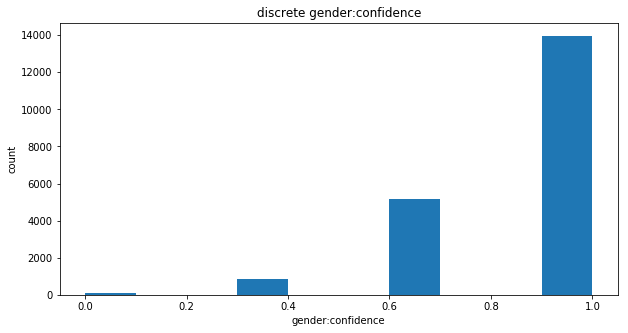

In [29]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

df['gender:confidence'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("gender:confidence")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete gender:confidence")

In [30]:
discrete_gender_confidence = np.linspace(min(df["gender:confidence"]), max(df["gender:confidence"]), 10)
discrete_gender_confidence

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [31]:
gender_confidence_levels = ['gender:confidence_1','gender:confidence_2','gender:confidence_3','gender:confidence_4','gender:confidence_5','gender:confidence_6','gender:confidence_7','gender:confidence_8','gender:confidence_9']

In [32]:
df['discrete-gender:confidence'] = pd.cut(df['gender:confidence'], discrete_gender_confidence, labels=gender_confidence_levels, include_lowest=True)

In [33]:
df[['gender:confidence','discrete-gender:confidence']].head(20)

,gender:confidence,discrete-gender:confidence
0,1.0000,gender:confidence_9
1,1.0000,gender:confidence_9
2,0.6625,gender:confidence_6
3,1.0000,gender:confidence_9
4,1.0000,gender:confidence_9
5,1.0000,gender:confidence_9
6,1.0000,gender:confidence_9
7,1.0000,gender:confidence_9
8,1.0000,gender:confidence_9
9,1.0000,gender:confidence_9


In [34]:
df['gender:confidence'].value_counts()

1.0000    13952
0.0000       71
0.6691       31
0.6709       30
0.6591       30
0.6667       30
0.6619       29
0.6686       27
0.6743       27
0.6769       26
0.6666       25
0.6678       24
0.6715       24
0.6707       24
0.6561       24
0.6752       24
0.6642       24
0.6656       24
0.6609       23
0.6675       23
0.6685       22
0.6766       22
0.6645       22
0.6741       22
0.6711       22
0.6774       22
0.6706       21
0.6659       21
0.6664       21
0.6739       21
          ...  
0.3468        1
0.6955        1
0.6323        1
0.3544        1
0.3337        1
0.3283        1
0.3557        1
0.3575        1
0.3622        1
0.3269        1
0.6986        1
0.3343        1
0.3339        1
0.3307        1
0.6931        1
0.3628        1
0.3319        1
0.3378        1
0.8458        1
0.6961        1
0.6059        1
0.3335        1
0.3722        1
0.3613        1
0.3461        1
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence,

In [35]:
#As you see above we changed from 923 continues values to 9 discrete values below 
df['discrete-gender:confidence'].value_counts()

gender:confidence_9    13958
gender:confidence_7     2775
gender:confidence_6     2382
gender:confidence_4      832
gender:confidence_1       71
gender:confidence_3       24
gender:confidence_8        7
gender:confidence_5        1
gender:confidence_2        0
Name: discrete-gender:confidence, dtype: int64

###### 2. Making profile_yn:confidence discrete

In [36]:
df[['profile_yn:confidence']]

,profile_yn:confidence
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [37]:
df['profile_yn:confidence'].value_counts()

1.0000    19642
0.6649        6
0.6557        6
0.6671        4
0.6436        4
0.6636        4
0.6523        3
0.6693        3
0.6767        3
0.6757        3
0.6694        3
0.6940        3
0.6606        3
0.6713        3
0.6838        3
0.6583        3
0.6839        3
0.6690        3
0.6594        3
0.6674        3
0.6538        3
0.6493        3
0.6552        3
0.6714        3
0.6543        3
0.6589        3
0.6711        3
0.6619        3
0.6659        3
0.6634        3
          ...  
0.6860        1
0.6760        1
0.6685        1
0.6889        1
0.6452        1
0.6675        1
0.6709        1
0.6592        1
0.6545        1
0.6494        1
0.9636        1
0.6581        1
0.6556        1
0.6456        1
0.6961        1
0.6467        1
0.6658        1
0.6540        1
0.6461        1
0.6500        1
0.6855        1
0.6641        1
0.6470        1
0.6424        1
0.6627        1
0.6567        1
0.6516        1
0.6816        1
0.6506        1
0.6913        1
Name: profile_yn:confide

Text(0.5,1,'discrete profile_yn:confidence')

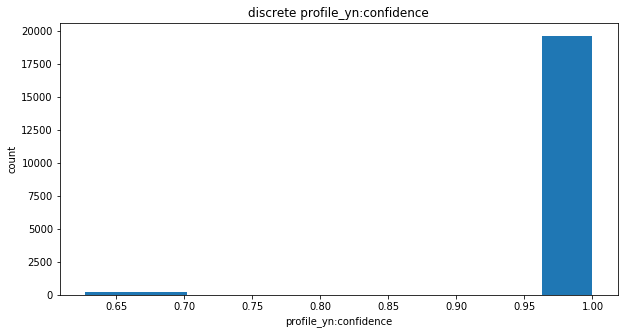

In [38]:
df['profile_yn:confidence'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("profile_yn:confidence")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete profile_yn:confidence")

In [39]:
discrete_profile_yn_confidence = np.linspace(min(df["profile_yn:confidence"]), max(df["profile_yn:confidence"]), 10)
discrete_profile_yn_confidence

array([0.6272    , 0.66862222, 0.71004444, 0.75146667, 0.79288889,
       0.83431111, 0.87573333, 0.91715556, 0.95857778, 1.        ])

In [40]:
profile_yn_confidence_levels = ['profile_yn_confidence_1','profile_yn_confidence_2','profile_yn_confidence_3','profile_yn_confidence_4','profile_yn_confidence_5','profile_yn_confidence_6','profile_yn_confidence_7','profile_yn_confidence_8','profile_yn_confidence_9']

In [41]:
df['discrete-profile_yn_confidence'] = pd.cut(df['profile_yn:confidence'], discrete_profile_yn_confidence, labels=profile_yn_confidence_levels, include_lowest=True)

In [42]:
df[['profile_yn:confidence','discrete-profile_yn_confidence']]

,profile_yn:confidence,discrete-profile_yn_confidence
0,1.0,profile_yn_confidence_9
1,1.0,profile_yn_confidence_9
2,1.0,profile_yn_confidence_9
3,1.0,profile_yn_confidence_9
4,1.0,profile_yn_confidence_9
5,1.0,profile_yn_confidence_9
6,1.0,profile_yn_confidence_9
7,1.0,profile_yn_confidence_9
8,1.0,profile_yn_confidence_9
9,1.0,profile_yn_confidence_9


In [43]:
df['profile_yn:confidence'].value_counts()

1.0000    19642
0.6649        6
0.6557        6
0.6671        4
0.6436        4
0.6636        4
0.6523        3
0.6693        3
0.6767        3
0.6757        3
0.6694        3
0.6940        3
0.6606        3
0.6713        3
0.6838        3
0.6583        3
0.6839        3
0.6690        3
0.6594        3
0.6674        3
0.6538        3
0.6493        3
0.6552        3
0.6714        3
0.6543        3
0.6589        3
0.6711        3
0.6619        3
0.6659        3
0.6634        3
          ...  
0.6860        1
0.6760        1
0.6685        1
0.6889        1
0.6452        1
0.6675        1
0.6709        1
0.6592        1
0.6545        1
0.6494        1
0.9636        1
0.6581        1
0.6556        1
0.6456        1
0.6961        1
0.6467        1
0.6658        1
0.6540        1
0.6461        1
0.6500        1
0.6855        1
0.6641        1
0.6470        1
0.6424        1
0.6627        1
0.6567        1
0.6516        1
0.6816        1
0.6506        1
0.6913        1
Name: profile_yn:confide

In [44]:
#As you see above we changed from 267 continues values to 9 discrete values below 
df['discrete-profile_yn_confidence'].value_counts()

profile_yn_confidence_9    19644
profile_yn_confidence_1      244
profile_yn_confidence_2      162
profile_yn_confidence_8        0
profile_yn_confidence_7        0
profile_yn_confidence_6        0
profile_yn_confidence_5        0
profile_yn_confidence_4        0
profile_yn_confidence_3        0
Name: discrete-profile_yn_confidence, dtype: int64

###### 3. Making fav_number discrete

In [45]:
df[['fav_number']]

,fav_number
0,0
1,68
2,7696
3,202
4,37318
5,3901
6,4122
7,80
8,1825
9,3115


In [46]:
df['fav_number'].value_counts()

0        3334
1         395
2         254
3         193
5         162
4         148
7         139
6         110
8         108
10         85
15         83
9          79
11         69
14         69
25         69
12         68
18         56
26         53
16         52
23         51
20         50
17         49
13         49
22         46
24         45
21         43
28         42
19         38
30         37
42         37
         ... 
14751       1
12718       1
16816       1
2489        1
4538        1
6587        1
35039       1
2505        1
4554        1
10701       1
12552       1
4474        1
2329        1
8458        1
4378        1
14623       1
4396        1
6443        1
12590       1
2361        1
14655       1
16704       1
2377        1
6475        1
8524        1
4380        1
4442        1
12638       1
2319        1
4006        1
Name: fav_number, Length: 6784, dtype: int64

Text(0.5,1,'discrete fav_number')

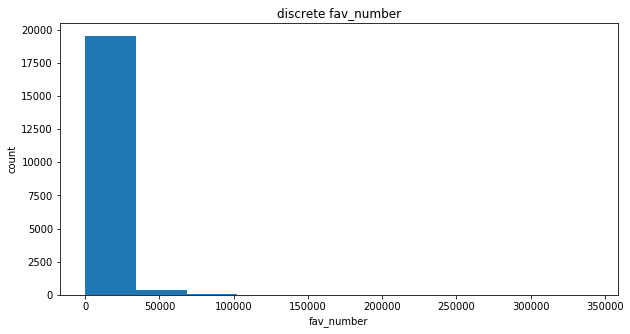

In [47]:
df['fav_number'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("fav_number")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete fav_number")

In [48]:
discrete_fav_number = np.linspace(min(df["fav_number"]), max(df["fav_number"]), 10)
discrete_fav_number

array([     0.        ,  37957.88888889,  75915.77777778, 113873.66666667,
       151831.55555556, 189789.44444444, 227747.33333333, 265705.22222222,
       303663.11111111, 341621.        ])

In [49]:
fav_number_levels = ['fav_number_1','fav_number_2','fav_number_3','fav_number_4','fav_number_5','fav_number_6','fav_number_7','fav_number_8','fav_number_9']

In [50]:
df['discrete-fav_number'] = pd.cut(df['fav_number'], discrete_fav_number, labels=fav_number_levels, include_lowest=True)

In [51]:
df[['fav_number','discrete-fav_number']]

,fav_number,discrete-fav_number
0,0,fav_number_1
1,68,fav_number_1
2,7696,fav_number_1
3,202,fav_number_1
4,37318,fav_number_1
5,3901,fav_number_1
6,4122,fav_number_1
7,80,fav_number_1
8,1825,fav_number_1
9,3115,fav_number_1


In [52]:
df['fav_number'].value_counts()

0        3334
1         395
2         254
3         193
5         162
4         148
7         139
6         110
8         108
10         85
15         83
9          79
11         69
14         69
25         69
12         68
18         56
26         53
16         52
23         51
20         50
17         49
13         49
22         46
24         45
21         43
28         42
19         38
30         37
42         37
         ... 
14751       1
12718       1
16816       1
2489        1
4538        1
6587        1
35039       1
2505        1
4554        1
10701       1
12552       1
4474        1
2329        1
8458        1
4378        1
14623       1
4396        1
6443        1
12590       1
2361        1
14655       1
16704       1
2377        1
6475        1
8524        1
4380        1
4442        1
12638       1
2319        1
4006        1
Name: fav_number, Length: 6784, dtype: int64

In [53]:
#As you see above we changed from 6784 continues values to 9 discrete values below 
df['discrete-fav_number'].value_counts()

fav_number_1    19600
fav_number_2      338
fav_number_3       73
fav_number_4       22
fav_number_6        6
fav_number_5        6
fav_number_7        3
fav_number_9        1
fav_number_8        1
Name: discrete-fav_number, dtype: int64

###### 4. Making tweet_count discrete

In [54]:
df[['tweet_count']]

,tweet_count
0,110964
1,7471
2,5617
3,1693
4,31462
5,20036
6,13354
7,112117
8,482
9,26085


In [55]:
df['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          24
2          21
76289      18
4          17
9          16
5          16
6          15
65787      15
7          15
25         14
8          14
3609       14
16         14
75         14
18         13
12         13
26         13
29         12
117        12
97         12
10         12
114        11
13         10
14209      10
14         10
96         10
11         10
           ..
2777        1
728         1
25300       1
37353       1
39482       1
47823       1
109261      1
8908        1
51953       1
29430       1
112427      1
2809        1
35625       1
25380       1
21282       1
6939        1
4890        1
66328       1
43789       1
74508       1
6068        1
2825        1
67356       1
195335      1
19201       1
57126       1
15103       1
13054       1
4858        1
100353      1
Name: tweet_count, Length: 14280, dtype: int64

Text(0.5,1,'discrete tweet_count')

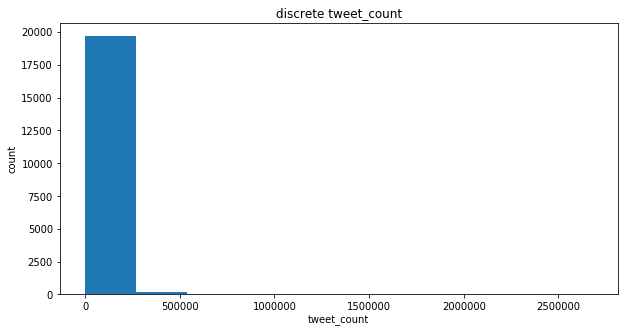

In [56]:
df['tweet_count'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("tweet_count")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete tweet_count")

In [57]:
discrete_tweet_count = np.linspace(min(df["tweet_count"]), max(df["tweet_count"]), 10)
discrete_tweet_count

array([1.00000000e+00, 2.97800778e+05, 5.95600556e+05, 8.93400333e+05,
       1.19120011e+06, 1.48899989e+06, 1.78679967e+06, 2.08459944e+06,
       2.38239922e+06, 2.68019900e+06])

In [58]:
tweet_count_levels = ['tweet_count_1','tweet_count_2','tweet_count_3','tweet_count_4','tweet_count_5','tweet_count_6','tweet_count_7','tweet_count_8','tweet_count_9']

In [59]:
df['discrete-tweet_count'] = pd.cut(df['tweet_count'], discrete_tweet_count, labels=tweet_count_levels, include_lowest=True)

In [60]:
df[['tweet_count','discrete-tweet_count']]

,tweet_count,discrete-tweet_count
0,110964,tweet_count_1
1,7471,tweet_count_1
2,5617,tweet_count_1
3,1693,tweet_count_1
4,31462,tweet_count_1
5,20036,tweet_count_1
6,13354,tweet_count_1
7,112117,tweet_count_1
8,482,tweet_count_1
9,26085,tweet_count_1


In [61]:
df['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          24
2          21
76289      18
4          17
9          16
5          16
6          15
65787      15
7          15
25         14
8          14
3609       14
16         14
75         14
18         13
12         13
26         13
29         12
117        12
97         12
10         12
114        11
13         10
14209      10
14         10
96         10
11         10
           ..
2777        1
728         1
25300       1
37353       1
39482       1
47823       1
109261      1
8908        1
51953       1
29430       1
112427      1
2809        1
35625       1
25380       1
21282       1
6939        1
4890        1
66328       1
43789       1
74508       1
6068        1
2825        1
67356       1
195335      1
19201       1
57126       1
15103       1
13054       1
4858        1
100353      1
Name: tweet_count, Length: 14280, dtype: int64

In [62]:
#As you see above we changed from 14280 continues values to 9 discrete values below 
df['discrete-tweet_count'].value_counts()

tweet_count_1    19766
tweet_count_2      181
tweet_count_3       38
tweet_count_4       27
tweet_count_8       24
tweet_count_5       10
tweet_count_6        2
tweet_count_9        1
tweet_count_7        1
Name: discrete-tweet_count, dtype: int64

In [63]:
df


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,discrete-gender:confidence,discrete-profile_yn_confidence,discrete-fav_number,discrete-tweet_count
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,"[40.798598, -73.971836]",110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,"[40.798598, -73.971836]",7471,10/26/15 12:40,6.587300e+17,London,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,"[40.798598, -73.971836]",5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,gender:confidence_6,profile_yn_confidence_9,fav_number_1,tweet_count_1
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,"[40.798598, -73.971836]",1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,"[40.798598, -73.971836]",31462,10/26/15 12:40,6.587300e+17,London,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,"[40.798598, -73.971836]",20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,"[40.798598, -73.971836]",13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,"[40.798598, -73.971836]",112117,10/26/15 12:40,6.587300e+17,London,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,"[40.798598, -73.971836]",482,10/26/15 12:40,6.587300e+17,London,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,"[40.798598, -73.971836]",26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam,gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1


In [64]:
df.to_csv(r'data.csv')